In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a model class that inherits nn.module

class Model(nn.Module):

  # 4 inputs in the input layer
  # hidden layer 1 (n inputs)
  # hidden layer 2 (n inputs)
  # output layer (3 classes)

  def __init__(self, in_features= 4, h1= 8, h2= 9, out_features= 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# We pick a random seed for manual randomization
torch.manual_seed(41)
# we create an instance of the model class
model = Model()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
# translating the labels into integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-1763365711.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
X = my_df.drop('species', axis=1)
Y = my_df['species']

In [8]:
import numpy as np
X = np.asarray(X)
Y = np.asarray(Y)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [11]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert Y labels to long tensors
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [12]:
# we set the error measuring criterion
criterion = nn.CrossEntropyLoss()
# we set an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [13]:
Epochs = 100
losses = []

for i in range(Epochs):
  # go forward and get a prediction
  Y_pred = model.forward(X_train)

  # measure the loss/error
  loss = criterion(Y_pred, Y_train)

  # keep track of the loss
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss} ')

  # do backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056 
Epoch: 10 and loss: 1.0096259117126465 
Epoch: 20 and loss: 0.8157405853271484 
Epoch: 30 and loss: 0.585706353187561 
Epoch: 40 and loss: 0.3999636471271515 
Epoch: 50 and loss: 0.26768800616264343 
Epoch: 60 and loss: 0.17942361533641815 
Epoch: 70 and loss: 0.12151690572500229 
Epoch: 80 and loss: 0.0860118493437767 
Epoch: 90 and loss: 0.06520850956439972 


Text(0.5, 0, 'Epoch')

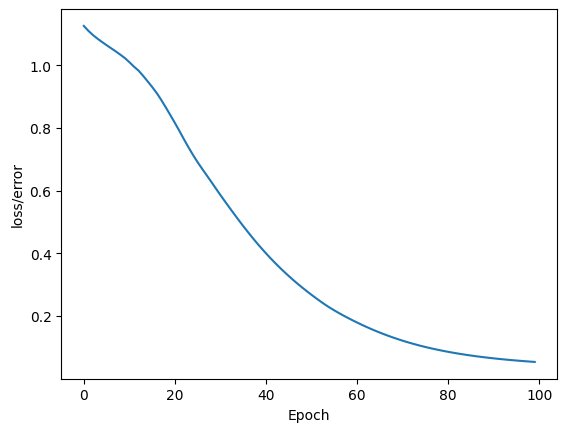

In [14]:
# graph the loss

plt.plot(range(Epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')



In [15]:
# evaluate model accuracy on the test set
with torch.no_grad(): # turns off backprop
  Y_eval = model.forward(X_test) # y_eval is the predicted values
  loss = criterion(Y_eval, Y_test)
  print(loss)

tensor(0.1315)


In [16]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    Y_val = model.forward(data)

    print(f'{i+1}.)  {str(Y_val)} \t {Y_test[i]} \t {Y_val.argmax().item()} ')

    # correct or not
    if Y_val.argmax().item() == Y_test[i]:
      correct += 1
print(f'we got {correct} correct')

1.)  tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2 
2.)  tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2 
3.)  tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2 
4.)  tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1 
5.)  tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2 
6.)  tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1 
7.)  tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2 
8.)  tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1 
9.)  tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2 
10.)  tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2 
11.)  tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2 
12.)  tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0 
13.)  tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0 
14.)  tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1 
15.)  tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0 
16.)  tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1 
17.)  tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0 
18.)  tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2 
19.)  tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0 
20.)  tensor([ 3.4528, -1.2514, -2.3660]

In [17]:
new_iris = torch.tensor([5.0, 3.0, 5.1, 1.8])

with torch.no_grad():
  print(model(new_iris))

tensor([-6.0721,  3.4510,  8.0196])


In [18]:
# we save the learned parameters (save the model so we don't have to retrain)
torch.save(model.state_dict(), 'Iris_species.pt')


In [21]:
# loading the model parameters
new_model = Model()
new_model.load_state_dict(torch.load('/content/Iris_species.pt'))

<All keys matched successfully>

In [22]:
# testing the loaded model
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)